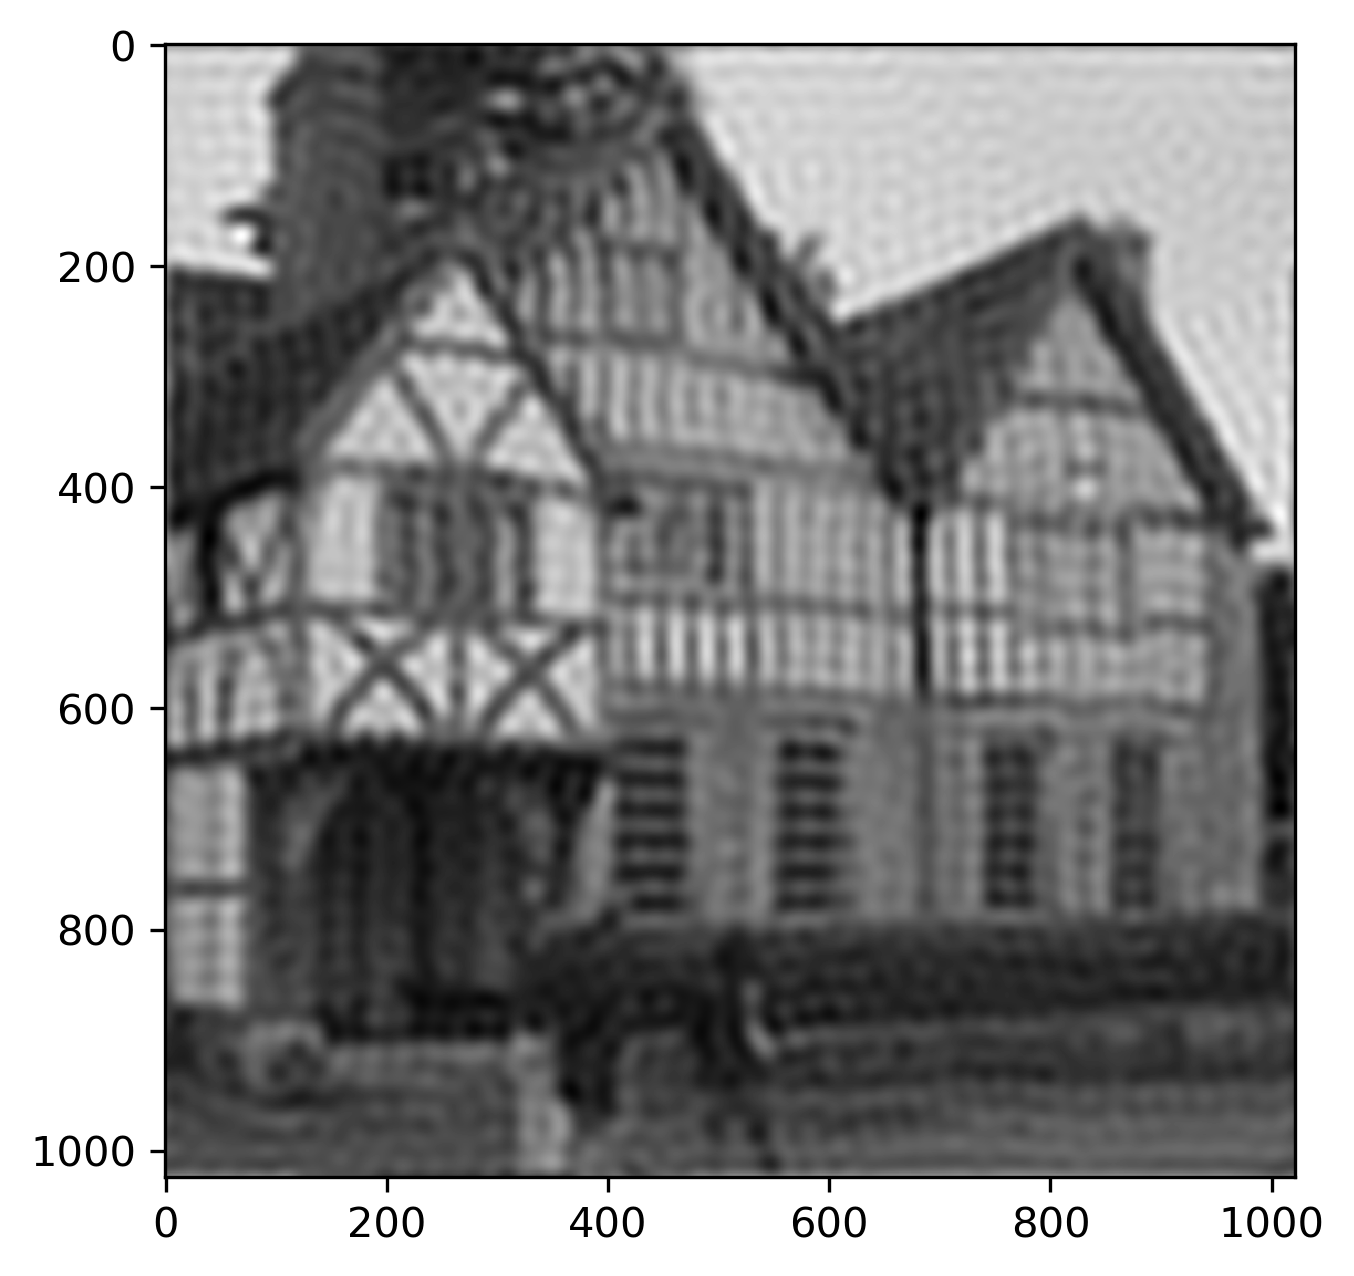

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def Spread(N,std):
    x1 = np.arange(0,N/2,1)
    x2 = np.arange(-N/2,0,1)

    x = np.concatenate((x1,x2))
    y = x.copy()

    X,Y = np.meshgrid(x,y)
    return np.exp(-((X)**2 + Y**2)/(2*(std**2)))

pic_blur = np.loadtxt('blur.txt')
dim      = np.shape(pic_blur)

std = 25
spr = Spread(dim[0],std)

pic_blur_FT = np.fft.rfft2(pic_blur)
spr_FT      = np.fft.rfft2(spr)

Nx = dim[0]
Ny = int(dim[1]/2)
pic_sharp_FT = np.zeros([Nx,Ny], dtype = complex)

for i in range(0,Nx):
    for j in range(0,Ny):
        if spr_FT[i,j] < 1e-5:
            pic_sharp_FT[i,j] = pic_blur_FT[i,j]
        else:
            pic_sharp_FT[i,j] = pic_blur_FT[i,j]/spr_FT[i,j]
        
pic_sharp    = np.fft.irfft2(pic_sharp_FT)/(Nx*Ny)

plt.figure(figsize = (5,5), dpi = 300)
plt.imshow(pic_sharp, cmap = 'gray')
plt.savefig('im_7_9c')